# Decision Trees

tree-based methods for **Regression** and **Classification** Problems

 - by stratifying or segmenting the predictor space into a number of simple regions
 
to improve prediction accuracy we  use Bagging, Random Forests and Boosting approaches

## Regression Trees

**Notation:**

 - **internal nodes** are kind of thresholds/ conditions where the tree splits
 
 - **terminal nodes/ leaves** are at the end of a tree and consisting of observation set $$ R_K=\{X|year\geq 4.5 \wedge hits < 117.5\}$$
 
 - segments of trees that connect the nodes **branches**
 
**Procedure:**
 1. divide the predictor space into $J$ distinct and non-overlapping regions $R_1,R_2,\dots,R_J$
 
 2. For every observation in $R_j$ make the same prediction, mean of response value for the training observations in $R_j$ (e.g. $\overline{x}(R_j)=10 \quad \Rightarrow \quad \forall x\in R_j \quad \hat{y}(x)=10$)
 
### How to construct $R_1,R_2,\dots,R_J$?

The Goal is to find boxes that minimize the RSS

$$ \sum_{j=1}^J \sum_{i \in R_j} (y_i-\hat{y}_{R_i})^2 \quad,\hat{y}_{R_i}=\overline{x}(R_j)$$

Note: it's computational infeasible to consider every possbile partition of $J$ boxes

**Solution: Recursive binary splitting**

 1. consider all predictors $X_1,\dots,X_p$ and all possible values of $s$ for each predictor
 
 2. choose the predictor and cutpoint such that the resulting tree has the lowest RSS
 
 3. continue until stopping criterion is reached (e.g. only 5 observations per $R_j$ are left)
 
Problem: predictions may only be good for training data $\Rightarrow$ **overfitting**

 - smaller tree (fewer splits): 
 * lower variance
 * better interpretation
 But: little bias!
 
 - alternative stopping criterion: use RSS threshold
 But: there is a chance to miss an important split!
 
### Tree Pruning

For each value of $\alpha$ there corresponds a subtree $T \subset T_0$ such that

$$ min \sum_{m=1}^{\mid T \mid} \sum_{i: x_i\in R_m} (y_i-\hat{y}_{R_m})^2 + \alpha \mid T \mid $$

we now constructed a trade-off between subtrees complexity and fit to the training data

use CV or Validation set approach to select $\alpha$

## Classification Trees

using Regression/ Classification Trees to solve Classification Problems. Remember response variable is now qualitative!

**Predict:** 
each observation belongs to the most commonly occuring class of training observations in the region to which it belongs

**Interpretation:**
 - class prediction corresponding to a particular terminal node region
 
 - class proportions among the training observations that fall into that region
 
Note: we need alternative measure for RSS!
 * classification error rate
   $$ E=1-max_k (\hat{p}_{mk})$$
   $\hat{p}_{mk}$ is the proportion of training observations in m'th region from class $k$
   
 * Gini-Index
   $$ G=\sum_{k=1}^K \hat{p}_{mk}(1-\hat{p}_{mk})$$
   
 * Cross-entropy
   $$ D= - \sum_{k=1}^K \hat{p}_{mk} log(\hat{p}_{mk}) $$
   
in general E is not sufficient sensitive for tree-growing, while for G \& D the following holds:
*the lower G \& D, the purer the nodes are*

**Summary:**
 - building tree: use Gini-Index, Cross-entropy
 
 - tree pruning: use classification error rate

## Linear Models vs. Trees

first compare the functional form:

 - linear models
   $$ f(x)=\beta_0 + \sum_{j=1}^p X_j \beta_j $$
 
 - tree based methods
   $$ f(x)= \sum_{m=1}^M c_m* I_{x\in R_m} $$
   
Advantages and Disadvantages of Trees

 * easy to explain, even for non-professionals
 
 * closely mirror human  decision-making
 
 * displayed graphically
 
 * easily handle qualitative predictors & missing data
 
 * not same predictive accuracy
 
 * can be very non-robust

## Bagging, Boosting and Random Forests

### Bagging

**Idea:** use Bootstrap to improve statistical learning tools

**Procedure:**
 1. take B seperate training sets from the population
 
 2. build a seperate prediction model using each training set
    $\hat{f}^1(x), \hat{f}^2(x),\dots, \hat{f}^B(x)$
 
 3. average resulting predictors
    $\hat{f}_{bag}(x)=\frac{1}{B}\sum_{b=1}^B \hat{f}^{*b}(x)$
    
#### Out-of-Bag (OOB)

since Bagging uses Bootstrap, we can estimate test error without CV or validation set approach.

Key to bagging is that trees are repeatedly fit to Bootstrapped subsets

one can show that each bagged tree uses only $2/3$ of obserbations, thus $1/3$ are refered as OOB observations

### Random Forests

**Idea:** 
improve Bagging by decorrelating the trees (subtrees)

**Procedure:**
 1. build a forest of decision trees bootstraped training samples
 
 2. each time a split in a tree is considered, random sample $m$ of the full set of $p$ predictors is choosen
 
 3. fresh sample of $m$ predictors in taken at each split (typically $m\approx \sqrt{p}$)
 
**Why?**
suppose one very strong predictor and other moderate predictors $\Rightarrow$ Bagged trees will all use ths strong predictor in the Top Split. Hence, averaging the correlated quantities will not reduce variance in the same magnitude as uncorrelated quantities!

**Random Forests and Bagging**
main difference is the choice of predictor subset $m$


### Boosting

**Idea:**
similar to Bagging, except that the trees are grown **sequentially** - each tree uses information from the previous tree (no Bootstrap sampling, instead using residuals form previous tree as response to fit the current tree)

**Procedure:**
 1. set $\hat{f}(x)=0$ and $r_i=y_i$ for all $i$ in the training set
 
 2. for  $b=1,2,\dots,B$ repeat:
   
   a) fit a tree $\hat{f}^b$ with $d$ splits ($d+1$ terminal nodes) to training data ($X,r$)
   
   b) update $\hat{f}$ by adding in a shrunken version of the new tree:
    $$ \hat{f}(x) \leftarrow \hat{f}(x) + \lambda\hat{f}^b(x) $$
   
   c) update residuals:
    $$ r_i \leftarrow r_i - \lambda \hat{f}^b(x_i) $$
  
 3. output the boosted model:
    $$ \hat{f}(x) = \sum_{b=1}^B \lambda \hat{f}^b(x) $$
    
      
 - $B$ is the number of trees (use CV to select $B$)
 
 - $\lambda$ shrinkage parameter controls the rate at which boosting learns (typically 0.01 or 0.001)
 
 - $d$ *interaction depth* number of splits in each tree (typically 1 or 2)

## Exercises

Installing package into 'C:/Users/fabia/OneDrive/Dokumente/R/win-library/3.6'
(as 'lib' is unspecified)


package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fabia\AppData\Local\Temp\RtmpEt8qEe\downloaded_packages


Warning message:
"package 'tree' was built under R version 3.6.1"

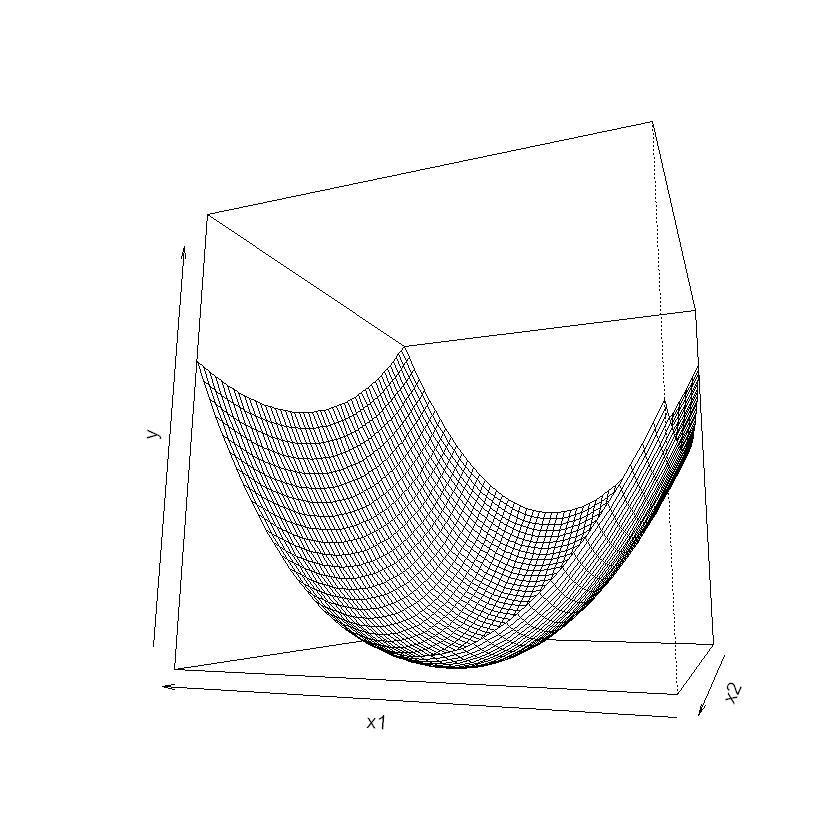

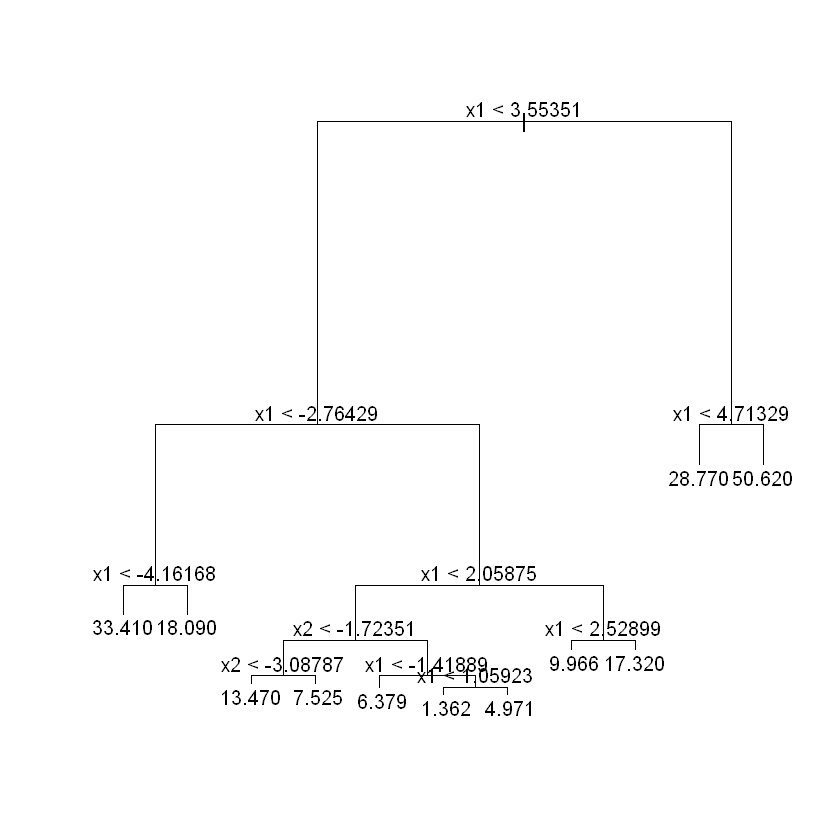

In [4]:
install.packages("tree")
library("tree")
set.seed(1987)

# DGP function
dgp1 <- function(n = 250, sd = 2, beta = c(.5, -1, 1.5, .5)) {
  X <- cbind(X <- replicate(2, rnorm(n, sd = sd)), X ^ 2)
  y <- X %*% beta + rnorm(n)
  list(y=y, x1=X[, 1], x2 = X[, 2])
}


# plot function 
dgp1_func <- function(x1, x2) .5 * x1 - 1 * x2 + 1.5 * x1 ^ 2 + .5 * x2 ^ 2
x1 <- x2 <- seq(-2, 2, le = 50)
y  <- outer(x1, x2, dgp1_func)
persp(x1, x2, y, theta = 200, phi = 350)


data_train <- dgp1()
tree_model <- tree(y ~ x1 + x2, data_train, split = "deviance")
plot(tree_model)
text(tree_model, pretty = 0)

In [5]:
compute_mse <- function(model_obj, data_test) {
  new_df <- data.frame(x1 = data_test$x1, x2 = data_test$x2)
  pred   <- predict(model_obj, newdata = new_df)
  
  mean((data_test$y - pred) ** 2)
}

linear_model  <- lm(y ~ x1 + x2 - 1, data_train)

data_test <- dgp1(n = 100)

mse_linear <- compute_mse(linear_model, data_test)
mse_tree   <- compute_mse(tree_model, data_test)
c(mse_linear=mse_linear, mse_tree=mse_tree)


monte_carlo_simu <- function(nsim = 1000) {
  mse_linear <- replicate(nsim, compute_mse(linear_model, dgp1(n = 100)))
  mse_tree   <- replicate(nsim, compute_mse(tree_model, dgp1(n = 100)))
  
  c(amse_linear=mean(mse_linear), amse_tree=mean(mse_tree))
}
monte_carlo_simu()

# OLS with squared covariates 
X      <- with(data_train, cbind(x1, x2, x1^2, x2^2))
beta_2 <- solve(t(X) %*% X) %*% t(X) %*% data_train$y

monte_carlo_simu2 <- function(nsim = 1000) {
  mse_2 <- function(data) {
    X_test <- with(data, cbind(x1, x2, x1^2, x2^2))
    
    mean((data$y - X_test %*% beta_2)^2)
  }
  
  mean(replicate(nsim, mse_2(dgp1(n = 100))))
}
c(monte_carlo_simu(), amse_linear2=monte_carlo_simu2())

mse_linear   mse_tree 
115.759421   9.710272

amse_linear   amse_tree 
  146.22570    14.09035

amse_linear    amse_tree amse_linear2 
  146.369930    13.136328     1.021836

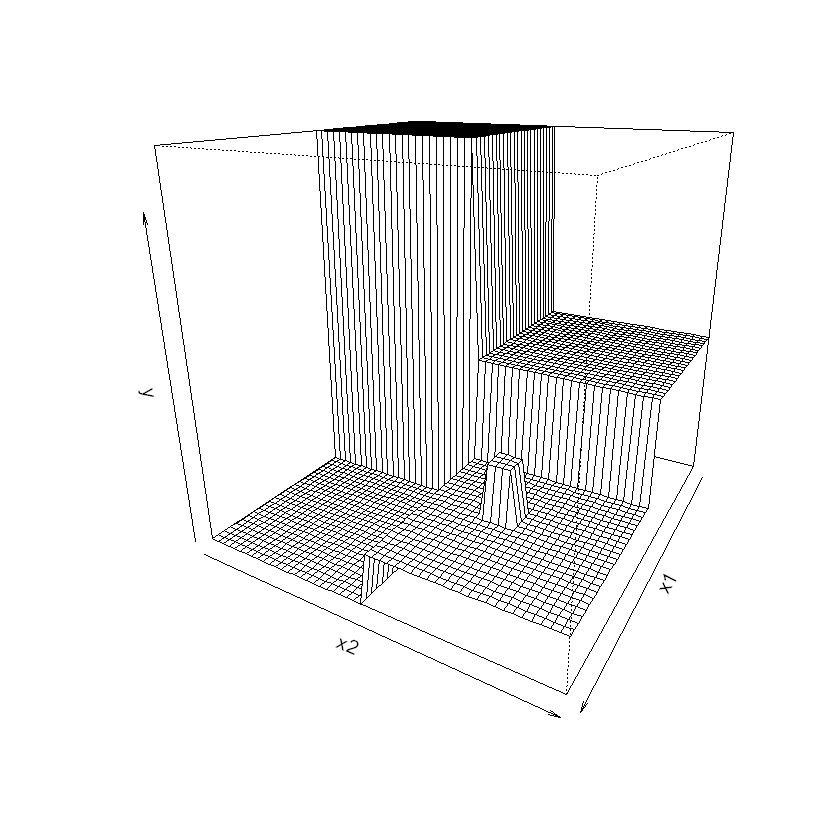

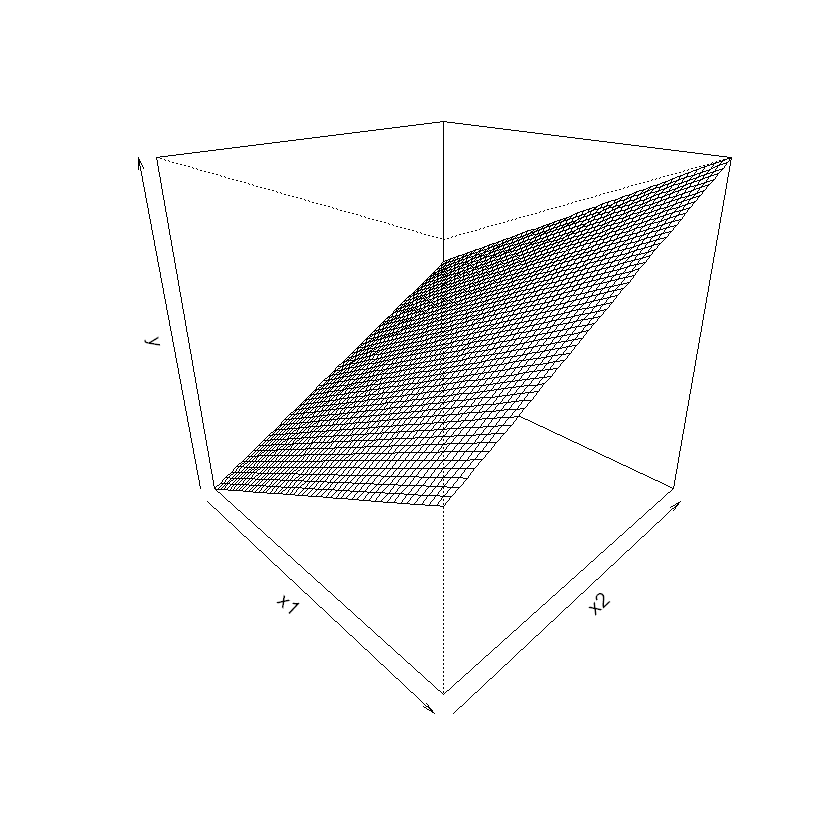

In [6]:
# DGPs well suited for analysis using regression trees

#dgp2 <- function(n = 250) {
#  x1 <- rnorm(n, sd = 2)
#  x2 <- rnorm(n, sd = 2)
#  y <- 5 * I(x1 < 0) + 2 * I(x2 < 0) + 3 * I(x1 > 0 & x2 > 0) + 
#          2 * I(x1 < 0 & x2 < 0) + 
#            1 * I(x1 < 1.5 & x1 > 1 & x2 < 1.5 & x2 > 1)
#  list(y=y, x1=x1, x2=x2)
#}

dgp2_func <- function(x1, x2) {
  5 * I(x1 < 0) + 2 * I(x2 < 0) + 3 * I(x1 > 0 & x2 > 0) + 
    2 * I(x1 < 0 & x2 < 0) + 
      1 * I(x1 < 1.5 & x1 > 1 & x2 < 1.5 & x2 > 1)
}

x1 <- seq(-3, 3, le = 50)
x2 <- seq(-3, 3, le = 50)
y  <- outer(x1, x2, dgp2_func)
persp(x1, x2, y, theta = 120, phi = 20)


# DGPs well suited for OLS 

#dgp3 <- function(n = 250) {
#  x1 <- rnorm(n, sd = 2)
#  x2 <- rnorm(n, sd = 2)
#  y <- x1 + x2
#  list(y=y, x1=x1, x2=x2)
#}

dgp3_func <- function(x1, x2) x1 + x2

x1 <- seq(-3, 3, le = 50)
x2 <- seq(-3, 3, le = 50)
y  <- outer(x1, x2, dgp3_func)
persp(x1, x2, y, theta = 45, phi = 25)